In [79]:
import json
import pandas 

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

fn = '/Users/alex/Desktop/neat_aws/output_files/r54048_20170426_180733__7_G01/job__ccs/tasks/pbreports.tasks.ccs_report-0/ccs_report.json'
with open(fn) as f:
    J = json.load(f)
    
J.keys()

dict_keys(['_comment', 'attributes', 'dataset_uuids', 'id', 'plotGroups', 'tables', 'title', 'uuid', 'version'])

In [80]:
seed = pandas.DataFrame(J['tables'][1]['columns'][0])
for n in J['tables'][1]['columns']:
    seed = seed.join(pandas.DataFrame(n), rsuffix='_right')
# print(seed.head())

df = seed.select_dtypes([int])
df.columns = [ '_', 'n_reads', 'n_bases', 'ccs_read_len_mean', 'mean_ccs_accuracy', 'n_passes' ]
df.drop('_', axis=1, inplace=True)
df

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,n_reads,n_bases,ccs_read_len_mean,mean_ccs_accuracy,n_passes
0,4458,4212409,944,0.990688,13
1,8289,7773127,937,0.990906,12
2,6095,7332847,1203,0.989936,11
3,7008,5700575,813,0.990029,14
4,4192,5524453,1317,0.989962,10
5,6029,6322548,1048,0.989773,11
6,2358,4066059,1724,0.991060,8
7,2625,4531155,1726,0.991156,8
8,2717,4690972,1726,0.991166,8
9,5643,6287424,1114,0.990026,11


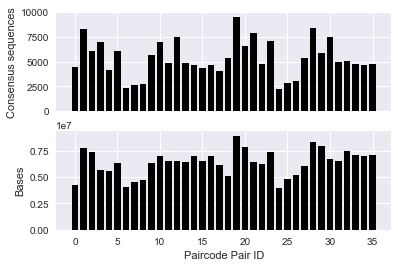

In [81]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].bar(df.index, df.n_reads, color='black')
ax[0].set_ylabel('Consensus sequences')
ax[1].bar(df.index, df.n_bases, color='black')
ax[1].set_xlabel('Paircode Pair ID')
ax[1].set_ylabel('Bases')
fig.savefig('fig1.pdf') 

In [82]:
df.columns

Index(['n_reads', 'n_bases', 'ccs_read_len_mean', 'mean_ccs_accuracy',
       'n_passes'],
      dtype='object')

In [83]:
import numpy as np 

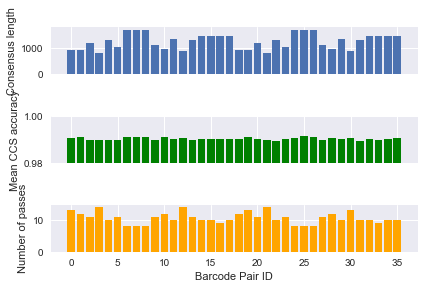

In [96]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].bar(df.index, df.ccs_read_len_mean)
ax[0].set_ylabel('Consensus length')
ax[1].bar(df.index, df.mean_ccs_accuracy, color='green')
ax[1].set_ylim((0.98,1))
ax[1].set_ylabel('Mean CCS accuracy')

ax[2].bar(df.index, df.n_passes, color='orange')
ax[2].set_ylabel('Number of passes')
ax[2].set_xlabel('Barcode Pair ID')

fig.tight_layout()
fig.savefig('fig2.pdf') 

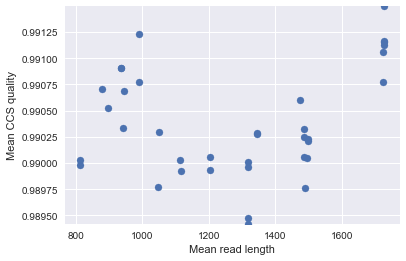

In [97]:
fig, ax = plt.subplots()
ax.scatter(df.ccs_read_len_mean, df.mean_ccs_accuracy)
ax.set_ylim((df.mean_ccs_accuracy.min(),df.mean_ccs_accuracy.max()))
ax.set_xlabel('Mean read length')
ax.set_ylabel('Mean CCS quality') 
fig.savefig('fig3.pdf')

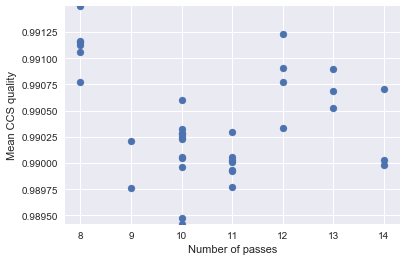

In [99]:
fig, ax = plt.subplots()
ax.scatter(df.n_passes, df.mean_ccs_accuracy)
ax.set_ylim((df.mean_ccs_accuracy.min(),df.mean_ccs_accuracy.max()))
ax.set_xlabel('Number of passes')
ax.set_ylabel('Mean CCS quality') 
fig.savefig('fig4.pdf')